In [761]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## <Step 1. 탐색> : 시간정보가 포함된 데이터 살펴보기
### [market price 데이터셋의 기본 정보]


In [762]:
# Data Source : https://www.blockchain.com/ko/charts/market-price?timespan=60days

file_path = '../Untitled Folder/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])
bitcoin_train_df = pd.read_csv(file_path, names = ['day', 'price'])

In [763]:
# 기본 정보를 출력합니다.
print(bitcoin_df.shape)
print(bitcoin_df.info())

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [764]:
bitcoin_df.tail()

,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


----------------------

### [시계열 데이터 살펴보기]

In [765]:
# to_datetime으로 day 피처를 시계열 피처로 변환합니다. 
bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])

# day 데이터프레임의 index로 설정합니다.
bitcoin_train_df.index = bitcoin_df['day']
bitcoin_train_df.set_index('day', inplace=True)
bitcoin_train_df.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


In [766]:
print(bitcoin_train_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-08-27 to 2018-08-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
None


In [767]:
bitcoin_train_df.describe()

,price
count,365.000000
mean,8395.863578
std,3239.804756
min,3319.630000
25%,6396.772500
50%,7685.633333
75%,9630.136277
max,19498.683333


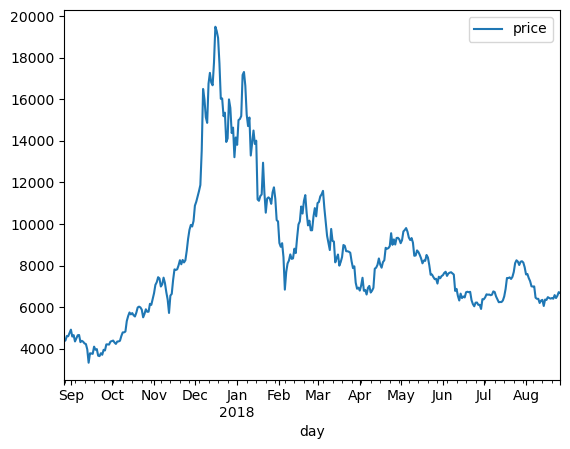

In [768]:
# 일자별 비트코인 시세를 시각화합니다.
bitcoin_train_df.plot()
plt.show()

## <Step2. 예측>: 파이썬 라이브러리를 활용한 시세 예측

### [SARIMAX 모델 활용하기]

SARIMA 모델 학습

In [769]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

import seaborn as sns

In [770]:
# Load the dataset

# Fit the ARIMA model
model = ARIMA(bitcoin_train_df.price.values, order=(2, 1, 2)) 
model_fit = model.fit()

# Generate the forecast
forecast_data = model_fit.forecast(steps=5)

# Print the forecast
print(forecast_data)
print(model_fit.summary())

[6672.47261626 6674.47232966 6674.46923138 6675.68255917 6675.97406849]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.490
Date:                Sat, 06 May 2023   AIC                           5584.980
Time:                        00:21:32   BIC                           5604.466
Sample:                             0   HQIC                          5592.725
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2418      0.305      0.793      0.428      -0.356       0.839
ar.L2          0.6071      0.200      3.036      0.002     

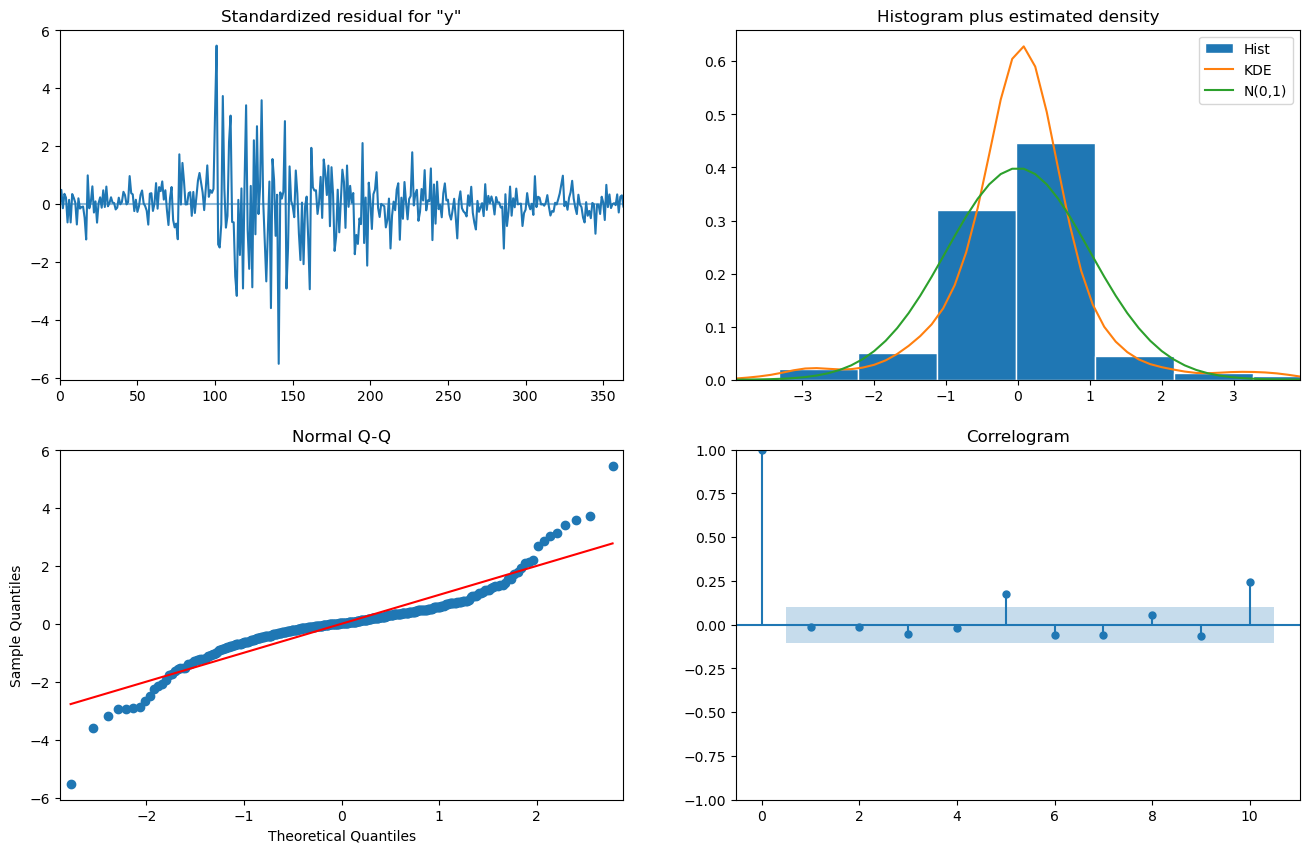

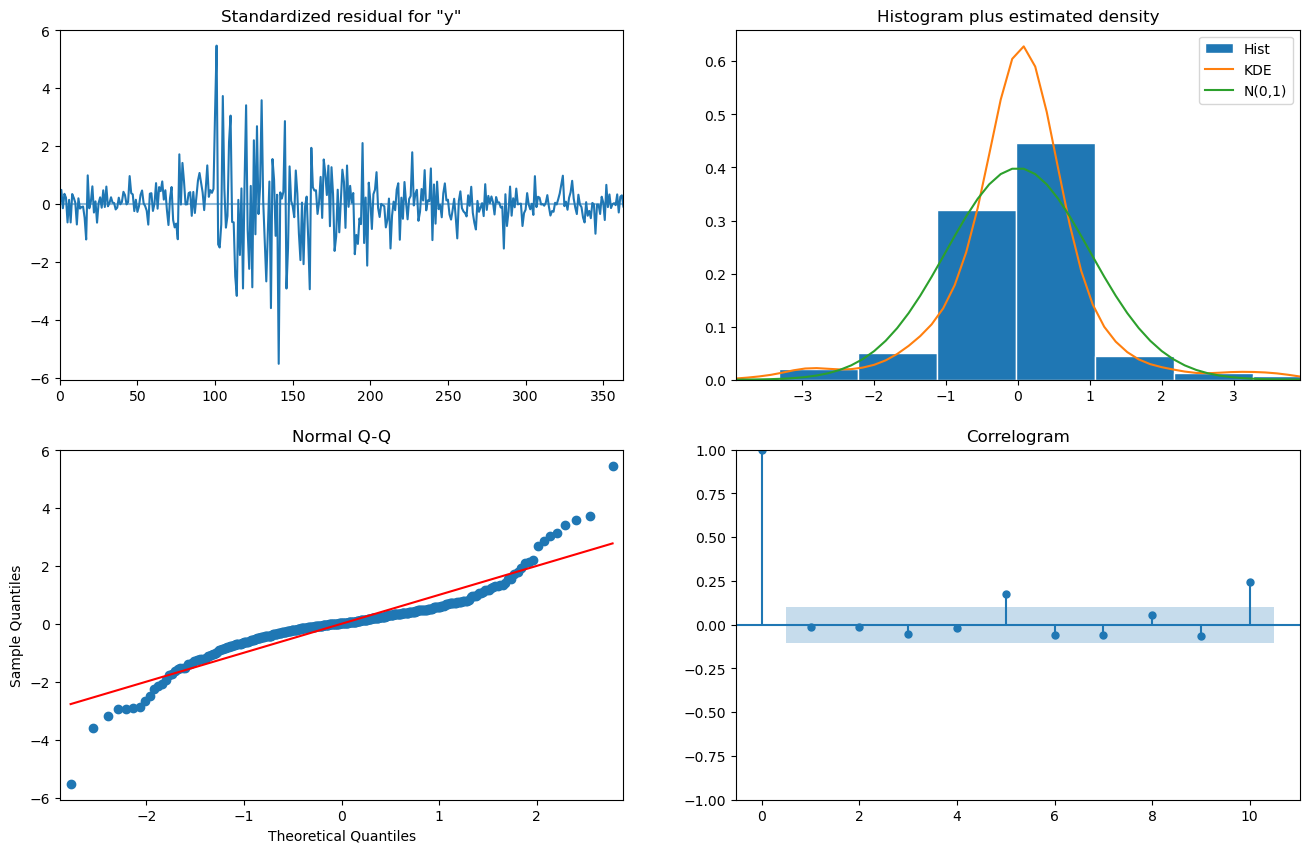

In [771]:
model_fit.plot_diagnostics(figsize=(16, 10))

In [772]:
bitcoin_train_df
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-08-27 to 2018-08-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [773]:
bitcoin_df['day']

0      2017-08-27 00:00:00
1      2017-08-28 00:00:00
2      2017-08-29 00:00:00
3      2017-08-30 00:00:00
4      2017-08-31 00:00:00
              ...         
360    2018-08-22 00:00:00
361    2018-08-23 00:00:00
362    2018-08-24 00:00:00
363    2018-08-25 00:00:00
364    2018-08-26 00:00:00
Name: day, Length: 365, dtype: object

### 파이썬으로 ARIMA 모델 돌리기 (예제와 다름)

In [774]:
X_train = bitcoin_train_df[bitcoin_train_df.index < '2018-8-08']
X_valid = bitcoin_train_df[bitcoin_train_df.index >= '2018-08-07']

In [775]:
index_20_days = pd.date_range(X_train.index[-1], freq='d', periods = 20, tz = None)

In [776]:
index_20_days

DatetimeIndex(['2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10',
               '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14',
               '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18',
               '2018-08-19', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24', '2018-08-25', '2018-08-26'],
              dtype='datetime64[ns]', freq='D')

In [777]:
X_valid

,price
day,
2018-08-07,6993.513333
2018-08-08,6450.366923
2018-08-09,6396.772500
2018-08-10,6396.494667
2018-08-11,6195.653333
2018-08-12,6311.131667
2018-08-13,6347.070000
2018-08-14,6050.942500
2018-08-15,6362.676923


In [778]:
model_arima = ARIMA(X_train, order=(2,1,2))
model_arima_fit = model_arima.fit()

fcast1 = model_arima_fit.forecast(4)[0]
fcast1 = pd.Series(fcast1, index=index_10_days)
fcast1 = fcast1.rename("Arima")

fcast1

2018-08-07    6987.937601
2018-08-08    6987.937601
2018-08-09    6987.937601
2018-08-10    6987.937601
2018-08-11    6987.937601
2018-08-12    6987.937601
2018-08-13    6987.937601
2018-08-14    6987.937601
2018-08-15    6987.937601
2018-08-16    6987.937601
2018-08-17    6987.937601
2018-08-18    6987.937601
2018-08-19    6987.937601
2018-08-20    6987.937601
2018-08-21    6987.937601
2018-08-22    6987.937601
2018-08-23    6987.937601
2018-08-24    6987.937601
2018-08-25    6987.937601
2018-08-26    6987.937601
Freq: D, Name: Arima, dtype: float64

<Axes: title={'center': 'Bitcoin Price'}, xlabel='day', ylabel='price'>

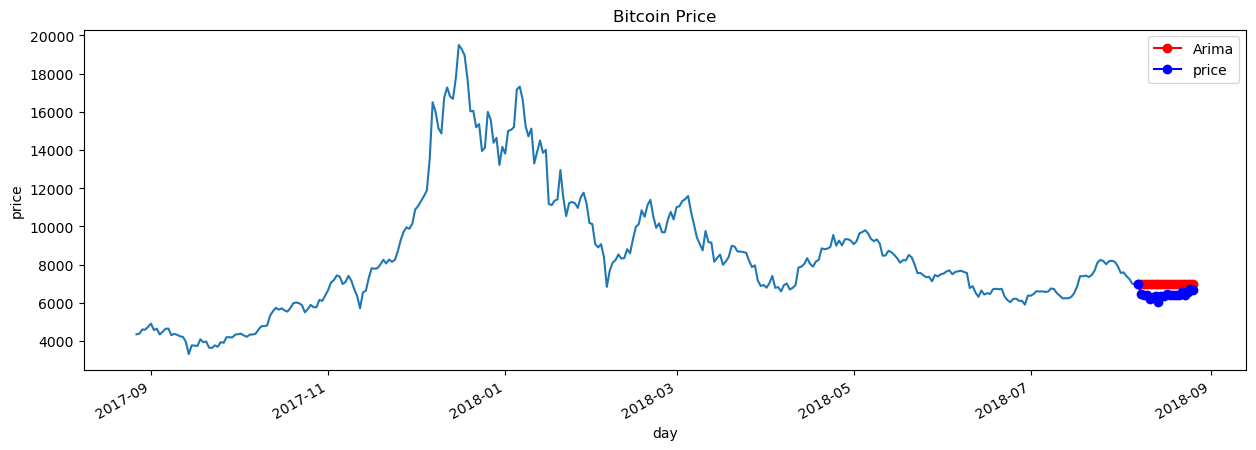

In [779]:
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='day', y='price', data = X_train)
chart.set_title('Bitcoin Price')
fcast1.plot(ax=ax, color='red',marker='o', legend = True)
X_valid.plot(ax=ax, color='blue', marker="o", legend = True)

(17713.0, 17774.0)

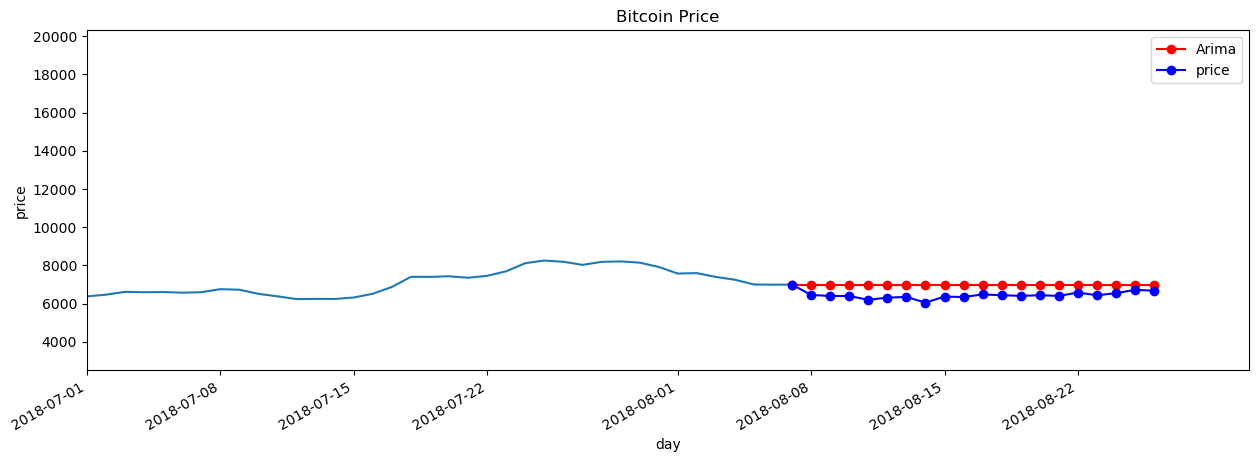

In [780]:
#특정 구간 확대
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='day', y='price', data = X_train)
chart.set_title('Bitcoin Price')
fcast1.plot(ax=ax, color='red',marker='o', legend = True)
X_valid.plot(ax=ax, color='blue', marker="o", legend = True)
ax.set_xlim([pd.Timestamp('2018-07-01'), pd.Timestamp('2018-08-31')])

In [781]:
#AIC 프린트하기
print('The MSE of ARIMA is:', mean_squared_error(X_valid['price'].values, fcast1.values, squared=False))

The MSE of ARIMA is: 573.2000985640093


## [Facebook Prophet 활용하기]

ARIMA보다 조금 더 정확한 트렌드 예측 분석을 제공하는 라이브러리 'FacebookProphet'을 사용하자.
Prophet 라이브러리를 사용하기 위해선 데이터 프레임의 피처를 'ds'와 'y'로 변경해야 한다. 
그리고 Prophet이라는 클래스를 선언한 뒤, fit() 함수로 모델을 학습시킨다. 
모델 생성에 포함되는 파라미터의 의미는 다음과 같다. 
- seasonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터
- chagepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터이다. 수치가 높을수록 모델은 과적합에 가까워진다. 
- Facebook Prophet 활용하기

In [782]:
from prophet import Prophet

In [783]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

00:21:43 - cmdstanpy - INFO - Chain [1] start processing
00:21:43 - cmdstanpy - INFO - Chain [1] done processing


In [784]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

In [785]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
365,2018-08-27,761.388417,6286.600231,7578.600713,761.388417,761.388417,9.4048,9.4048,9.4048,8.093558,...,-0.006508,-0.006508,-0.006508,-1.304734,-1.304734,-1.304734,0.0,0.0,0.0,6923.729894
366,2018-08-28,765.603120,6351.838624,7700.900799,765.603120,765.603120,9.4048,9.4048,9.4048,8.173506,...,0.018221,0.018221,0.018221,-1.249515,-1.249515,-1.249515,0.0,0.0,0.0,7023.265119
367,2018-08-29,769.817824,6361.748851,7761.957064,769.817824,772.216593,9.4048,9.4048,9.4048,8.153554,...,-0.042423,-0.042423,-0.042423,-1.208823,-1.208823,-1.208823,0.0,0.0,0.0,7046.569049
368,2018-08-30,774.032527,6398.664918,7839.455347,774.032527,785.897962,9.4048,9.4048,9.4048,8.205198,...,-0.013930,-0.013930,-0.013930,-1.185672,-1.185672,-1.185672,0.0,0.0,0.0,7125.122516
369,2018-08-31,778.247230,6475.365741,7996.234170,774.269601,805.216042,9.4048,9.4048,9.4048,8.257321,...,0.035047,0.035047,0.035047,-1.182526,-1.182526,-1.182526,0.0,0.0,0.0,7204.484524


In [786]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6923.729894,6286.600231,7578.600713
366,2018-08-28,7023.265119,6351.838624,7700.900799
367,2018-08-29,7046.569049,6361.748851,7761.957064
368,2018-08-30,7125.122516,6398.664918,7839.455347
369,2018-08-31,7204.484524,6475.365741,7996.234170


다음은 prophet 모델의 학습 결과를 시각화한 결과이다. 그래프의 검은점은 실제 가격을 파란 선은 예측 가격을 나타낸다. 

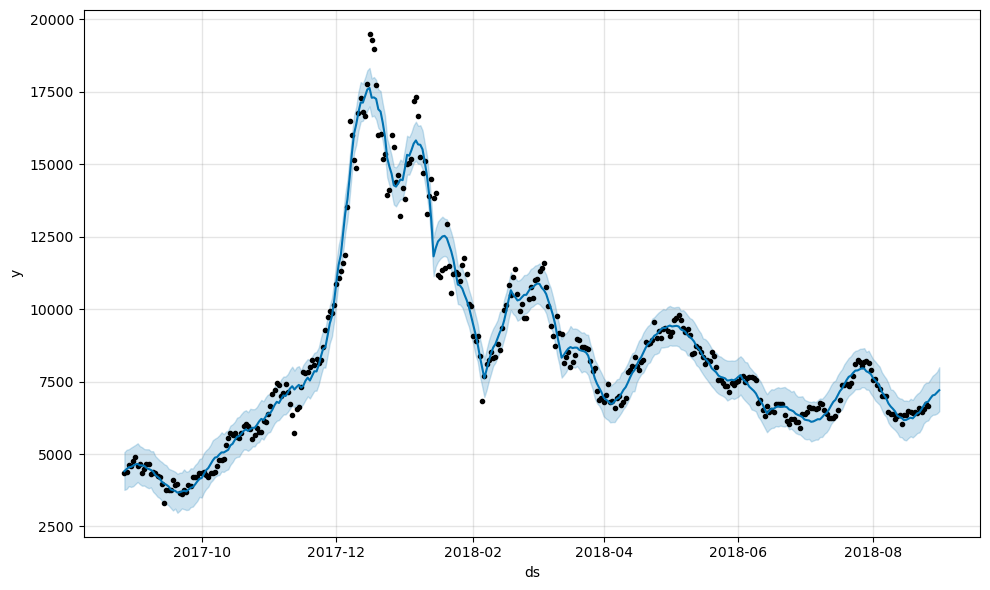

In [787]:
fig1 = prophet.plot(forecast_data)

다음은 트렌드 정보 시각화 그래프이다. 앞서 seasonality_mode 파라미터를 설정해놓은 경우에만 이 시각화가 가능하다. 

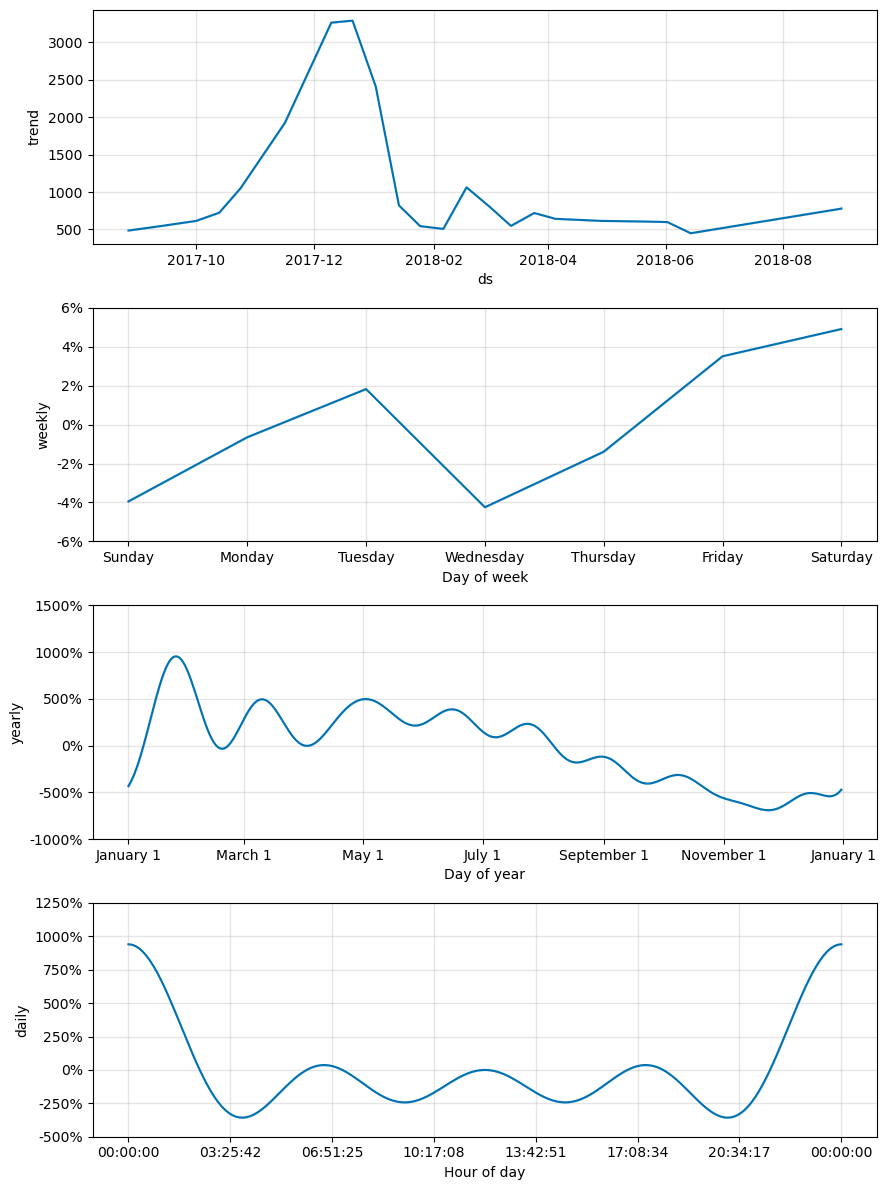

In [788]:
fig2 = prophet.plot_components(forecast_data)

ARIMA 모델을 평가한 것과 동일한 방법으로 테스트 데이터셋을 평가한다. 
아래 코드 실행결과 ARIMA 모델보다는 prophet 모델이 실제 price보다 더 근접한 결과를 나타낸다. 

In [789]:
y = bitcoin_df.y.values[5:] # 첫 5일을 제외한 실제 가격 데이터입니다.
y_pred = forecast_data.yhat.values[5:-5] # 첫 5일, 마지막 5일을 제외한 예측 가격 데이터입니다.

In [790]:
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

522.1910345623269
0.9737885957637682


#### 실제 데이터와의 비교
- 예측 결과인 마지막 5일과의 비교

In [791]:
test_file_path = '../Untitled Folder/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

pred_y = forecast_data.yhat.values[-5:] # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = forecast_data.yhat_lower.values[-5:] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-5:] # 마지막 5일의 예측 데이터의 최대값입니다.

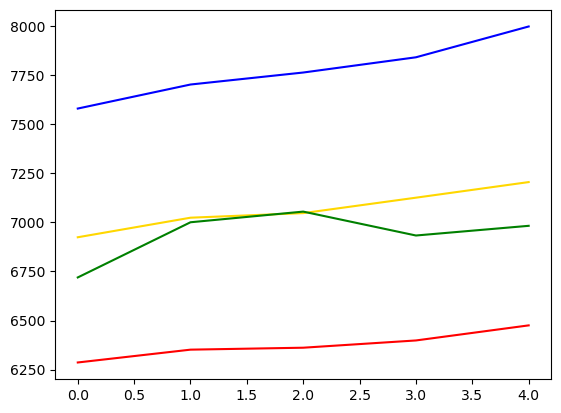

In [792]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

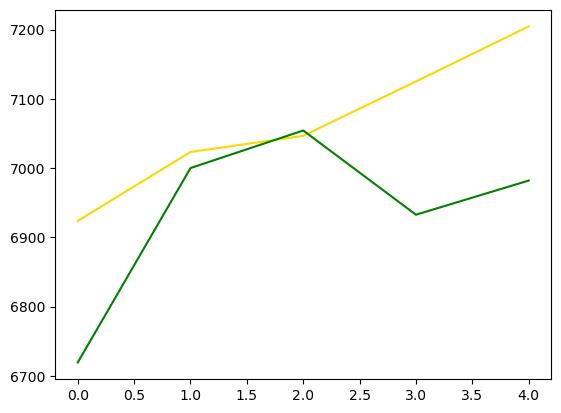

In [793]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [794]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

160.6041188672698


# Step3. 활용: 더 나은 결과를 위한 방법들
### [상한가 및 하한가 선정]
- 주가데이터의 경우 의미가 없지만, 일반적인 시계열 데이터의 경우 상한값 혹은 하한값을 잘 설정해주는 것이 도움됨

In [795]:
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])

# 상한가를 설정합니다.
bitcoin_df['cap'] = 20000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정합니다.
prophet = Prophet(seasonality_mode='multiplicative', 
                  growth='logistic',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

00:24:30 - cmdstanpy - INFO - Chain [1] start processing
00:24:30 - cmdstanpy - INFO - Chain [1] done processing


In [796]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')

# 상한가를 설정합니다.
future_data['cap'] = 20000
forecast_data = prophet.predict(future_data)

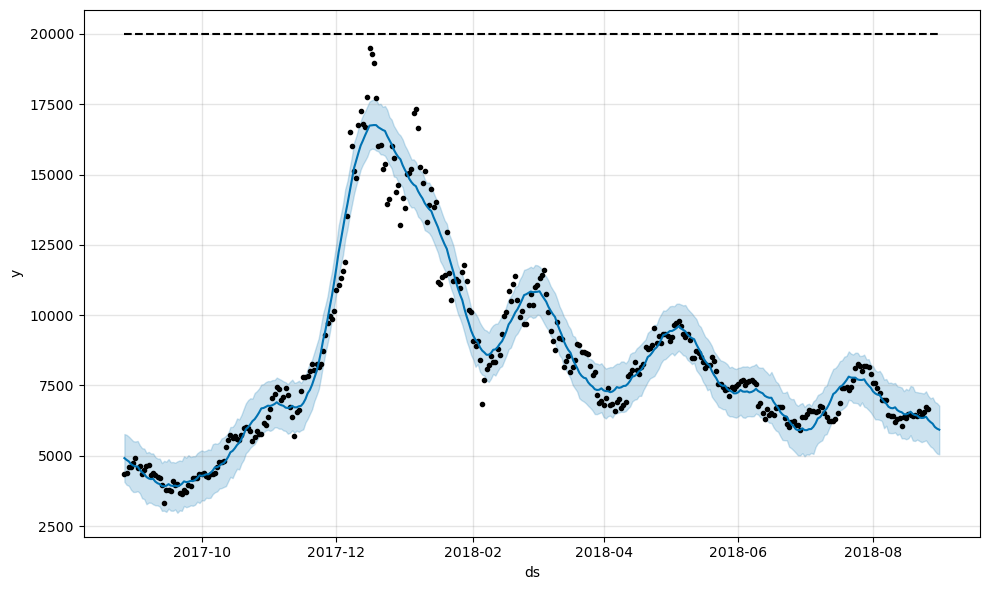

In [797]:
fig = prophet.plot(forecast_data)

-----------

#### 실제 데이터와의 비교
- 비트코인 데이터의 경우, 상한선을 둠으로써 오히려 예측력이 다소 떨어지는 결과를 보인다.

In [802]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# 모델이 예상한 마지막 5일의 가격 데이터를 가져옵니다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

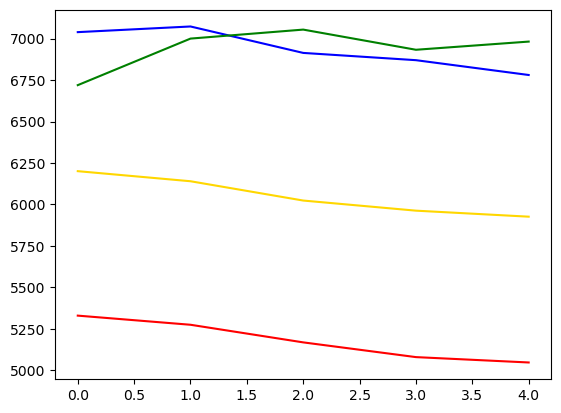

In [803]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

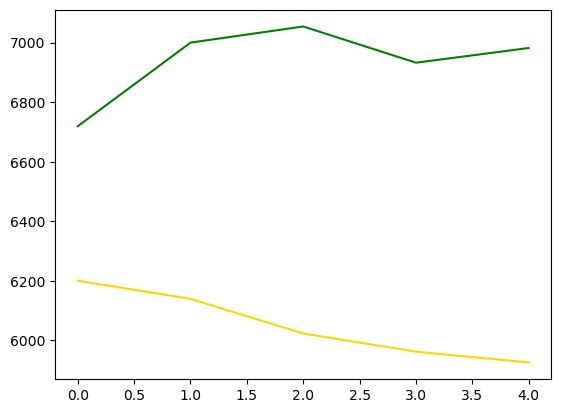

In [804]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [801]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

908.7383765690912


### [이상치 제거하기]
- 가격이 18000을 넘어가는 값을 이상치로 판단하여 제거합니다.

In [805]:
# 18000 이상의 데이터는 이상치라고 판단
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
bitcoin_df.loc[bitcoin_df['y'] > 18000, 'y'] = None

00:26:48 - cmdstanpy - INFO - Chain [1] start processing
00:26:49 - cmdstanpy - INFO - Chain [1] done processing


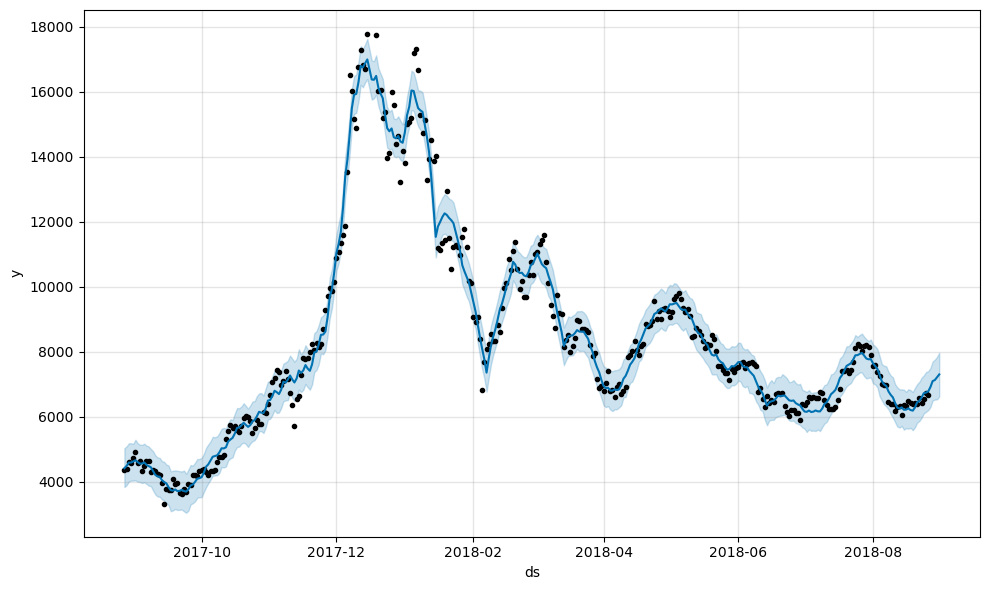

In [806]:
# prophet 모델을 학습합니다.
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# 5일단위의 미래를 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

# 예측 결과를 그래프로 출력합니다.
fig = prophet.plot(forecast_data)

----------------

#### 실제 데이터와의 비교
- 비트코인 데이터의 경우, 이상치를 제거함으로써 오히려 예측력이 다소 떨어지는 결과를 보였습니다. 
- 모델의 정확도 스토어 측면에서는 떨어졌지만, 트렌드 예측의 측면에서는 다소 나은 모습을 보여줄 수도 있습니다.

In [807]:
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'])

# 모델이 예상한 마지막 5일의 가격 데이터를 가져옵니다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

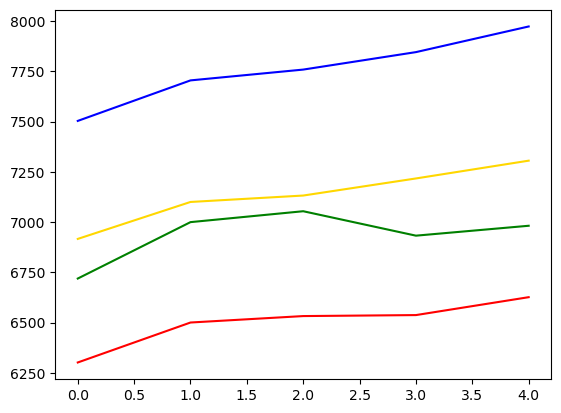

In [808]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

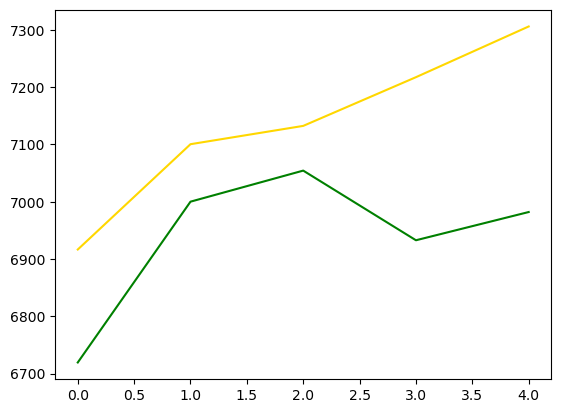

In [809]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [810]:
# 테스트 데이터의 RMSE를 출력합니다.
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

219.5869078527331
